In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import os
import numpy as np
import shutil
import random

In [ ]:
train_data_dir = "/content/drive/My Drive/dataset/train"
val_data_dir = "/content/drive/My Drive/dataset/val"
test_data_dir = "/content/drive/My Drive/dataset/test"
category_names = os.listdir('/content/drive/My Drive/dataset/train')
nb_categories = len(category_names)

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers, Model
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
from tensorflow.keras.callbacks import TensorBoard

In [ ]:
img_height, img_width = 224,224
base_model = ResNet50(input_shape = (img_width, img_height, 3), # Shape of our images
                                include_top = False, # Leave out the last fully connected layer
                                weights = 'imagenet')

94773248/94765736 [==============================] - 2s 0us/step


In [ ]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final softmax layer for classification
x = layers.Dense  (nb_categories, activation='softmax')(x)           

model = Model(base_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
#Number of images to load at each iteration
batch_size = 32
# only rescaling
train_datagen =  ImageDataGenerator(
    rescale=1./255
)
test_datagen =  ImageDataGenerator(
    rescale=1./255
)
# these are generators for train/test data that will read pictures #found in the defined subfolders of 'data/'
print('Total number of images for "training":')
train_generator = train_datagen.flow_from_directory(
train_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size, 
class_mode = "categorical")
print('Total number of images for "validation":')
val_generator = test_datagen.flow_from_directory(
val_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
class_mode = "categorical",
shuffle=False)
print('Total number of images for "testing":')
test_generator = test_datagen.flow_from_directory(
test_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
class_mode = "categorical",
shuffle=False)

Total number of images for "training":
Found 5272 images belonging to 15 classes.
Total number of images for "validation":
Found 1326 images belonging to 15 classes.
Total number of images for "testing":
Found 1125 images belonging to 15 classes.


In [ ]:
checkpoint = ModelCheckpoint("/content/drive/My Drive/model_resnet50.h5", monitor = 'val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto')
tensorboard=TensorBoard(log_dir="/content/drive/My Drive/logs/augresnet50epochs20")

In [ ]:
history = model.fit(
            train_generator,
            validation_data = val_generator,
            epochs = 20,
            shuffle=True,
            verbose = 1,
            callbacks=[checkpoint,tensorboard])

Epoch 1/20
165/165 [==============================] - ETA: 0s - loss: 0.8383 - acc: 0.9404 
Epoch 00001: val_acc improved from -inf to 0.05882, saving model to model_resnet50.h5
165/165 [==============================] - 2974s 18s/step - loss: 0.8383 - acc: 0.9404 - val_loss: 8.5866 - val_acc: 0.0588
Epoch 2/20
165/165 [==============================] - ETA: 0s - loss: 0.0640 - acc: 0.9901
Epoch 00002: val_acc improved from 0.05882 to 0.11765, saving model to model_resnet50.h5
165/165 [==============================] - 204s 1s/step - loss: 0.0640 - acc: 0.9901 - val_loss: 5.9848 - val_acc: 0.1176
Epoch 3/20
165/165 [==============================] - ETA: 0s - loss: 0.0431 - acc: 0.9979
Epoch 00003: val_acc improved from 0.11765 to 0.26923, saving model to model_resnet50.h5
165/165 [==============================] - 201s 1s/step - loss: 0.0431 - acc: 0.9979 - val_loss: 2.8339 - val_acc: 0.2692
Epoch 4/20
165/165 [==============================] - 199s 1s/step - loss: 0.1649 - acc: 0.991

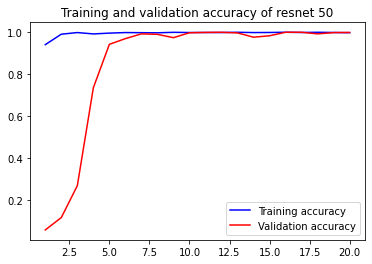

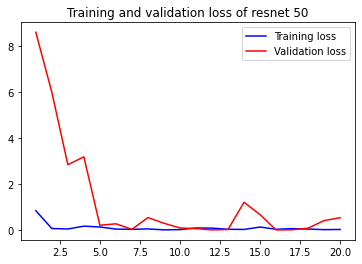

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.figure()
plt.plot(epochs, acc, 'b', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy of resnet 50')
plt.legend()
plt.savefig('Accuracy.jpg')
plt.figure()
plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss of resnet 50')
plt.legend()
plt.savefig('Loss.jpg')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes, figname,normalize=False,title="Confusion matrix",cmap=plt.cm.Blues):

  
  '''
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  '''
  if normalize :
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
      print('Confusion matrix, without normalization')
      
  plt.figure(figsize=(8,8))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  #plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=90)
  plt.yticks(tick_marks, classes)
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
    horizontalalignment='center',
    color='white' if cm[i, j] > thresh else 'black')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.savefig(figname)

Confusion matrix, without normalization


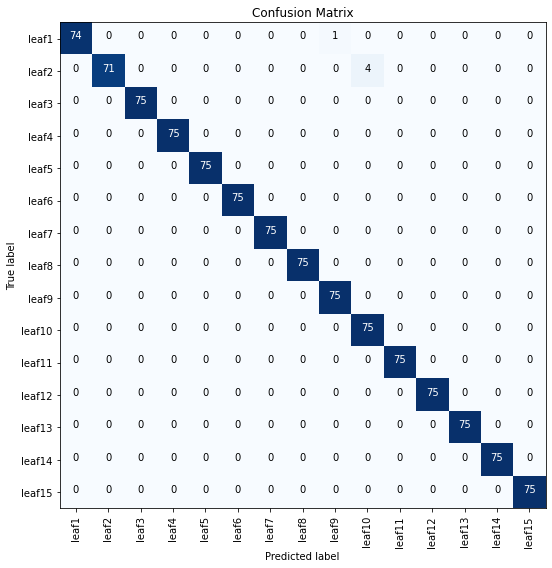

In [ ]:
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, classes = category_names, normalize=False,  title='Confusion Matrix',figname = 'Confusion_matrix_concrete.jpg')

In [ ]:
accuracy = accuracy_score(test_generator.classes, y_pred)
print("Accuracy in test set: %0.3f%% " % (accuracy * 100))

Accuracy in test set: 99.556% 
